# Meta Agent Parameter Sweep Analysis

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Load results
results_dir = Path("results")
results_file = list(results_dir.glob("param_sweep_*.json"))[-1]  # Most recent
print(f"Loading: {results_file}")

with open(results_file) as f:
    data = json.load(f)

metadata = data["metadata"]
all_results = data["all_results"]

print(f"Total configurations: {metadata['total_configs']}")
print(f"Games per config: {metadata['num_games']}")

Loading: results/param_sweep_20251212_043025.json
Total configurations: 500
Games per config: 500


In [3]:
# Convert to DataFrame
rows = []
for r in all_results:
    row = r["config"].copy()
    row["win_rate_random"] = r["win_rate_random"]
    row["win_rate_selfish"] = r["win_rate_selfish"]
    row["combined_score"] = r["combined_score"]
    rows.append(row)

df = pd.DataFrame(rows)
df.head(10)

,fasc_policy_prez_sus,fasc_policy_chanc_sus,conflict_sus,vote_threshold_mult,win_rate_random,win_rate_selfish,combined_score
0,2.5,2.0,1.5,1.0,0.734,0.580,0.657
1,3.0,2.0,2.5,1.0,0.726,0.580,0.653
2,3.0,2.0,1.5,1.0,0.720,0.582,0.651
3,2.5,2.0,2.5,1.0,0.700,0.600,0.650
4,3.0,1.5,2.0,1.0,0.712,0.582,0.647
5,2.5,1.5,1.0,1.0,0.712,0.580,0.646
6,2.5,2.0,1.0,1.0,0.716,0.576,0.646
7,1.5,0.5,2.0,1.0,0.714,0.576,0.645
8,2.0,1.5,2.5,1.0,0.720,0.570,0.645
9,3.0,2.0,2.0,1.0,0.730,0.560,0.645


## Top 10 Configurations

In [4]:
top10 = df.nlargest(10, "combined_score")
top10

,fasc_policy_prez_sus,fasc_policy_chanc_sus,conflict_sus,vote_threshold_mult,win_rate_random,win_rate_selfish,combined_score
0,2.5,2.0,1.5,1.0,0.734,0.580,0.657
1,3.0,2.0,2.5,1.0,0.726,0.580,0.653
2,3.0,2.0,1.5,1.0,0.720,0.582,0.651
3,2.5,2.0,2.5,1.0,0.700,0.600,0.650
4,3.0,1.5,2.0,1.0,0.712,0.582,0.647
5,2.5,1.5,1.0,1.0,0.712,0.580,0.646
6,2.5,2.0,1.0,1.0,0.716,0.576,0.646
7,1.5,0.5,2.0,1.0,0.714,0.576,0.645
8,2.0,1.5,2.5,1.0,0.720,0.570,0.645
9,3.0,2.0,2.0,1.0,0.730,0.560,0.645


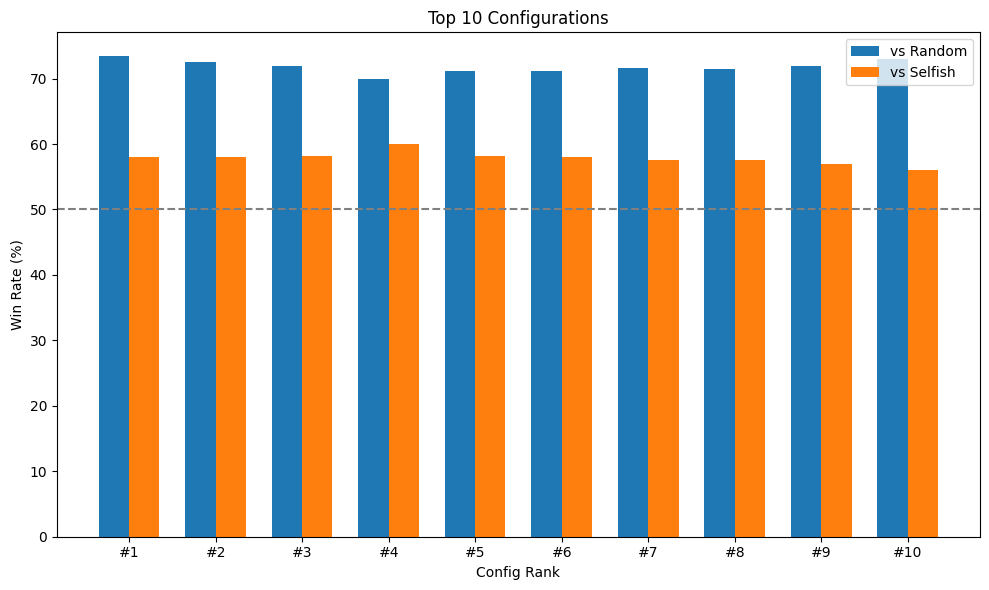

In [5]:
# Bar chart of top 10
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(10)
width = 0.35

ax.bar(x - width/2, top10["win_rate_random"] * 100, width, label="vs Random")
ax.bar(x + width/2, top10["win_rate_selfish"] * 100, width, label="vs Selfish")

ax.set_xlabel("Config Rank")
ax.set_ylabel("Win Rate (%)")
ax.set_title("Top 10 Configurations")
ax.set_xticks(x)
ax.set_xticklabels([f"#{i+1}" for i in range(10)])
ax.legend()
ax.axhline(y=50, linestyle="--", color="gray")

plt.tight_layout()
plt.show()

## Parameter Impact Analysis

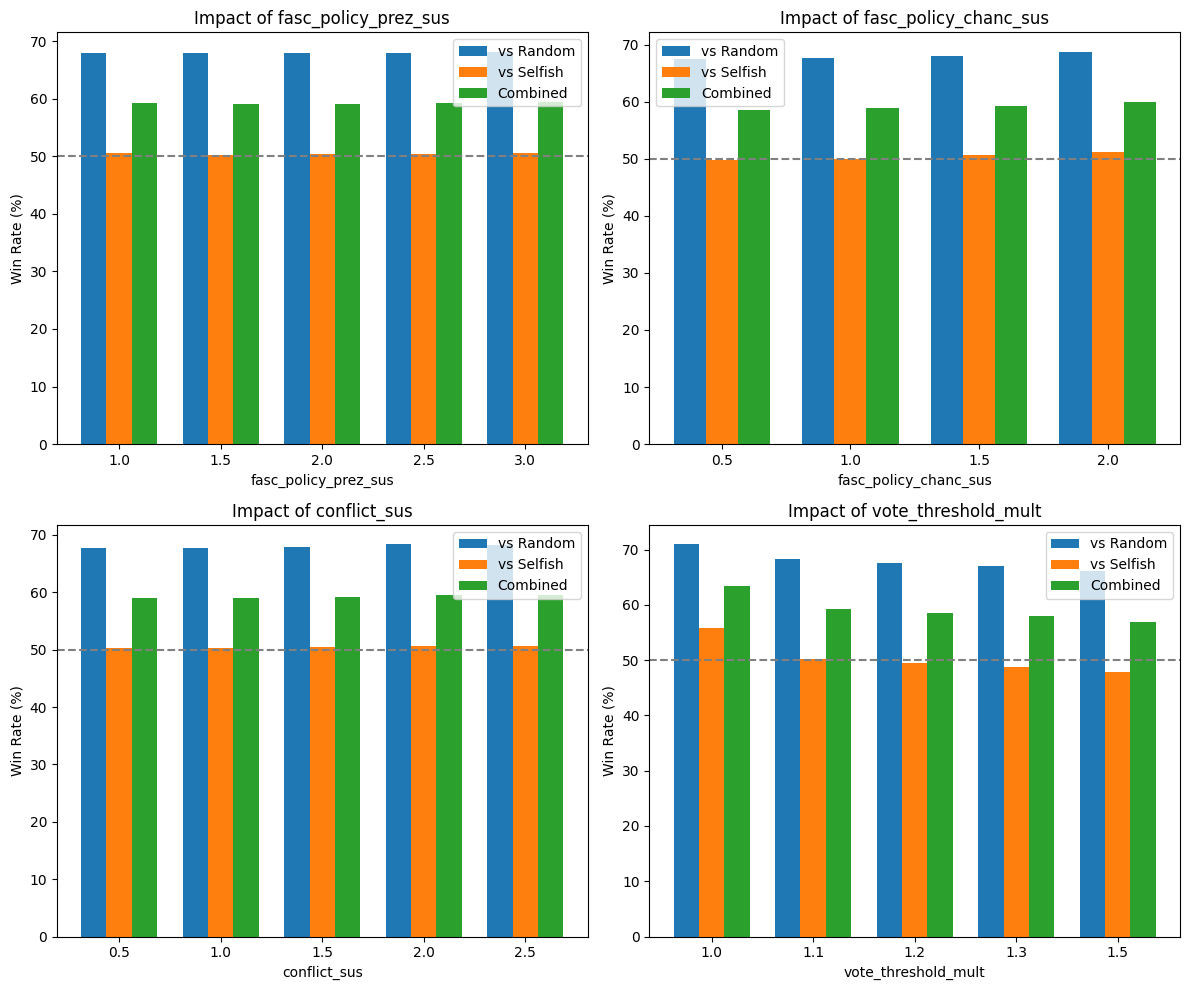

In [6]:
# Average win rate by each parameter value
params = ["fasc_policy_prez_sus", "fasc_policy_chanc_sus", "conflict_sus", "vote_threshold_mult"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, param in enumerate(params):
    ax = axes[idx]
    
    grouped = df.groupby(param).agg({
        "win_rate_random": "mean",
        "win_rate_selfish": "mean",
        "combined_score": "mean"
    }).reset_index()
    
    x = np.arange(len(grouped))
    width = 0.25
    
    ax.bar(x - width, grouped["win_rate_random"] * 100, width, label="vs Random")
    ax.bar(x, grouped["win_rate_selfish"] * 100, width, label="vs Selfish")
    ax.bar(x + width, grouped["combined_score"] * 100, width, label="Combined")
    
    ax.set_xlabel(param)
    ax.set_ylabel("Win Rate (%)")
    ax.set_title(f"Impact of {param}")
    ax.set_xticks(x)
    ax.set_xticklabels(grouped[param].values)
    ax.legend()
    ax.axhline(y=50, linestyle="--", color="gray")

plt.tight_layout()
plt.show()

## Heatmaps

In [ ]:
# Heatmap: fasc_policy_prez_sus vs fasc_policy_chanc_sus
pivot = df.groupby(["fasc_policy_prez_sus", "fasc_policy_chanc_sus"])["combined_score"].mean().unstack()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(pivot.values * 100, aspect="auto")

ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_xticklabels(pivot.columns)
ax.set_yticklabels(pivot.index)
ax.set_xlabel("fasc_policy_chanc_sus")
ax.set_ylabel("fasc_policy_prez_sus")
ax.set_title("Combined Score: Prez vs Chanc Suspicion")

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        ax.text(j, i, f"{pivot.values[i, j]*100:.1f}", ha="center", va="center", color="white")

plt.colorbar(im, ax=ax, label="Combined Win Rate (%)")
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap: conflict_sus vs vote_threshold_mult
pivot = df.groupby(["conflict_sus", "vote_threshold_mult"])["combined_score"].mean().unstack()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(pivot.values * 100, aspect="auto")

ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_xticklabels(pivot.columns)
ax.set_yticklabels(pivot.index)
ax.set_xlabel("vote_threshold_mult")
ax.set_ylabel("conflict_sus")
ax.set_title("Combined Score: Conflict Sus vs Vote Threshold")

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        ax.text(j, i, f"{pivot.values[i, j]*100:.1f}", ha="center", va="center", color="white")

plt.colorbar(im, ax=ax, label="Combined Win Rate (%)")
plt.tight_layout()
plt.show()

## Distribution of Results

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df["win_rate_random"] * 100, bins=20)
axes[0].set_xlabel("Win Rate vs Random (%)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution: vs Random")
axes[0].axvline(x=df["win_rate_random"].max() * 100, linestyle="--", color="red", label=f"Best: {df['win_rate_random'].max()*100:.1f}%")
axes[0].legend()

axes[1].hist(df["win_rate_selfish"] * 100, bins=20)
axes[1].set_xlabel("Win Rate vs Selfish (%)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution: vs Selfish")
axes[1].axvline(x=df["win_rate_selfish"].max() * 100, linestyle="--", color="red", label=f"Best: {df['win_rate_selfish'].max()*100:.1f}%")
axes[1].legend()

axes[2].hist(df["combined_score"] * 100, bins=20)
axes[2].set_xlabel("Combined Score (%)")
axes[2].set_ylabel("Count")
axes[2].set_title("Distribution: Combined")
axes[2].axvline(x=df["combined_score"].max() * 100, linestyle="--", color="red", label=f"Best: {df['combined_score'].max()*100:.1f}%")
axes[2].legend()

plt.tight_layout()
plt.show()

## Scatter: Random vs Selfish Win Rates

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(df["win_rate_random"] * 100, df["win_rate_selfish"] * 100, 
                     c=df["combined_score"] * 100, cmap="viridis", alpha=0.6)

# Mark top 10
top10 = df.nlargest(10, "combined_score")
ax.scatter(top10["win_rate_random"] * 100, top10["win_rate_selfish"] * 100, 
           c="red", marker="x", s=100, label="Top 10")

ax.set_xlabel("Win Rate vs Random (%)")
ax.set_ylabel("Win Rate vs Selfish (%)")
ax.set_title("Trade-off: Random vs Selfish Performance")
ax.axhline(y=50, linestyle="--", color="gray")
ax.axvline(x=50, linestyle="--", color="gray")
ax.legend()

plt.colorbar(scatter, ax=ax, label="Combined Score (%)")
plt.tight_layout()
plt.show()

## Best Configuration Summary

In [ ]:
best = df.loc[df["combined_score"].idxmax()]
best_random = df.loc[df["win_rate_random"].idxmax()]
best_selfish = df.loc[df["win_rate_selfish"].idxmax()]

print("=" * 60)
print("BEST OVERALL (Combined Score)")
print("=" * 60)
print(f"fasc_policy_prez_sus = {best['fasc_policy_prez_sus']}")
print(f"fasc_policy_chanc_sus = {best['fasc_policy_chanc_sus']}")
print(f"conflict_sus = {best['conflict_sus']}")
print(f"vote_threshold_mult = {best['vote_threshold_mult']}")
print(f"\nvs Random: {best['win_rate_random']*100:.1f}%")
print(f"vs Selfish: {best['win_rate_selfish']*100:.1f}%")
print(f"Combined: {best['combined_score']*100:.1f}%")

print("\n" + "=" * 60)
print("BEST vs RANDOM")
print("=" * 60)
print(f"Config: prez={best_random['fasc_policy_prez_sus']}, chanc={best_random['fasc_policy_chanc_sus']}, conflict={best_random['conflict_sus']}, vote={best_random['vote_threshold_mult']}")
print(f"Win rate: {best_random['win_rate_random']*100:.1f}%")

print("\n" + "=" * 60)
print("BEST vs SELFISH")
print("=" * 60)
print(f"Config: prez={best_selfish['fasc_policy_prez_sus']}, chanc={best_selfish['fasc_policy_chanc_sus']}, conflict={best_selfish['conflict_sus']}, vote={best_selfish['vote_threshold_mult']}")
print(f"Win rate: {best_selfish['win_rate_selfish']*100:.1f}%")